In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
plt.style.use('classic')

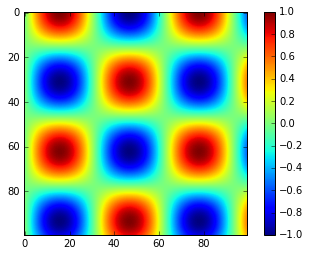

In [29]:
# 创建一个简单颜色条
x = np.linspace(0, 10, 100)
I = np.sin(x) * np.cos(x[:, np.newaxis])
plt.imshow(I)
plt.colorbar()

### 配置颜色条

通过`plt.cm.<TAB>`可以查询配色方案

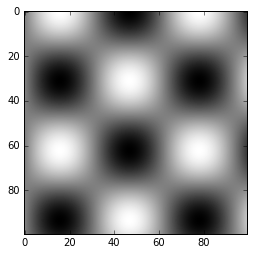

In [34]:
plt.imshow(I, cmap='gray')

配色方案
+ 顺序配色：由一组连续的颜色构成的配色方案（例如 binary 或viridis） 。
+ 互逆配色：通常由两种互补的颜色构成， 表示正反两种含义（例如 RdBu或 PuOr） 。
+ 定性配色：随机顺序的一组颜色（例如 rainbow 或 jet）

In [36]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

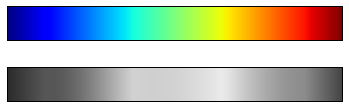

In [37]:
view_colormap('jet')

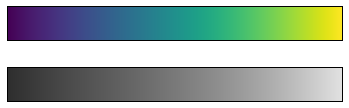

In [45]:
view_colormap('viridis')

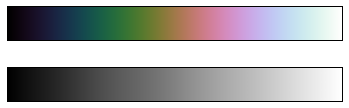

In [46]:
view_colormap('cubehelix')

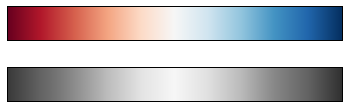

In [49]:
view_colormap('RdBu')

### 颜色条刻度的限制与扩展设置

Matplotlib 提供了丰富的颜色条配置功能。 由于可以将颜色条本身
仅看作是一个 plt.Axes 实例， 因此前面所学的所有关于坐标轴和
刻度值的格式配置技巧都可以派上用场。 颜色条有一些有趣的特
性。 例如， 我们可以缩短颜色取值的上下限， 对于超出上下限的数
据， 通过 extend 参数用三角箭头表示比上限大的数或者比下限小
的数。 


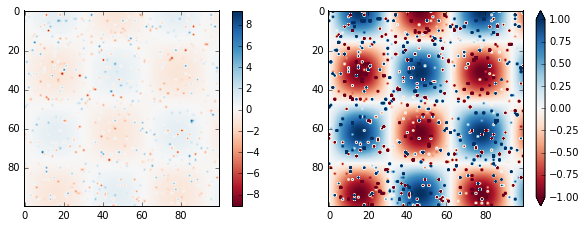

In [62]:
# 为图形像素设置1%的噪点
speckles = np.random.random(I.shape) < 0.01
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))
plt.figure(figsize=(10, 3.5))
plt.subplot(1,2,1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1,1)

### 离散型颜色线条

+ 最简单的办法就是通过`plt.cm.get_cmap(color, interval)`，把颜色和区间传进去

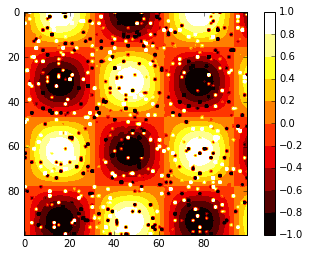

In [71]:
plt.imshow(I, cmap=plt.cm.get_cmap('hot', 10))
plt.colorbar()
plt.clim(-1,1)

### 案例：手写数字